In [4]:
pip install blinker click colorama contourpy cycler Flask fonttools itsdangerous Jinja2 joblib kiwisolver MarkupSafe matplotlib==3.9.2 numpy==2.1.3 packaging==24.2 pandas==2.2.3 pillow==11.0.0 pyparsing==3.2.0 python-dateutil==2.9.0.post0 pytz==2024.2 scikit-learn==1.5.2 scipy==1.14.1 setuptools==75.6.0 six==1.16.0 threadpoolctl==3.5.0 tzdata==2024.2 Werkzeug==3.1.3 wheel==0.45.1


  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached fonttools-4.55.0-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached scikit_learn-1.5.2-cp


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [14]:
# Carregar a base de dados enviada pelo usuário

data = pd.read_csv('C:\\Users\\higor\\OneDrive\\Área de Trabalho\\modelo_dados\\notebook\\data\\gym_members_exercise_tracking.csv')

In [15]:
# Verificar as primeiras linhas e as colunas disponíveis

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

(   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
 0   56    Male         88.3        1.71      180      157           60   
 1   46  Female         74.9        1.53      179      151           66   
 2   32  Female         68.1        1.66      167      122           54   
 3   25    Male         53.2        1.70      190      164           56   
 4   38    Male         46.1        1.79      188      158           68   
 
    Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
 0                      1.69           1313.0         Yoga            12.6   
 1                      1.30            883.0         HIIT            33.9   
 2                      1.11            677.0       Cardio            33.4   
 3                      0.59            532.0     Strength            28.8   
 4                      0.64            556.0     Strength            29.2   
 
    Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \


In [16]:
# Converter duração da sessão de horas para minutos
data['Session_Duration (minutes)'] = data['Session_Duration (hours)'] * 60

In [17]:
# Selecionar apenas colunas relevantes para o modelo
relevant_data = data[['Gender', 'Workout_Type', 'Session_Duration (minutes)', 'Fat_Percentage']]

In [18]:
# Separar os dados por gênero
data_male = relevant_data[relevant_data['Gender'] == 'Male']
data_female = relevant_data[relevant_data['Gender'] == 'Female']

In [19]:
# Corrigindo o uso do parâmetro de acordo com versões mais antigas do scikit-learn
encoder = OneHotEncoder(sparse_output=False, drop='first')


# Reaplicar a codificação do tipo de exercício
encoded_exercises_male = encoder.fit_transform(data_male[['Workout_Type']])

encoded_exercises_female = encoder.transform(data_female[['Workout_Type']])


In [20]:
# Adicionar as colunas codificadas ao dataframe
columns_encoded = encoder.get_feature_names_out(['Workout_Type'])
data_male_encoded = pd.concat([data_male.reset_index(drop=True),
                                pd.DataFrame(encoded_exercises_male, columns=columns_encoded)], axis=1)

data_female_encoded = pd.concat([data_female.reset_index(drop=True),
                                  pd.DataFrame(encoded_exercises_female, columns=columns_encoded)], axis=1)

In [21]:
# Separar entradas (X) e saídas (y) para cada grupo
X_male = data_male_encoded[['Session_Duration (minutes)'] + list(columns_encoded)]
y_male = data_male_encoded['Fat_Percentage']

X_female = data_female_encoded[['Session_Duration (minutes)'] + list(columns_encoded)]
y_female = data_female_encoded['Fat_Percentage']

In [22]:
# Função para gerar dados sintéticos
def generate_synthetic_data(X, y, factor=2):
    """
    Gera dados sintéticos duplicando o número de exemplos.
    'factor' define quantas vezes o tamanho do dataset será aumentado.
    """
    synthetic_X = []
    synthetic_y = []

    for i in range(X.shape[0]):
        for _ in range(factor):
            noise = np.random.normal(0, 0.1, X.shape[1])  # Ruído pequeno
            synthetic_X.append(X.iloc[i] + noise)  # Cria um novo exemplo com ruído
            synthetic_y.append(y.iloc[i])

    synthetic_X = np.array(synthetic_X)
    synthetic_y = np.array(synthetic_y)

    return pd.DataFrame(synthetic_X, columns=X.columns), pd.Series(synthetic_y)

# Gerar dados sintéticos
X_male_synthetic, y_male_synthetic = generate_synthetic_data(X_male, y_male, factor=3)  # Aumenta 3x o dataset
X_female_synthetic, y_female_synthetic = generate_synthetic_data(X_female, y_female, factor=3)

# Concatenar os dados sintéticos com os dados originais
X_male_combined = pd.concat([X_male, X_male_synthetic], axis=0)
y_male_combined = pd.concat([y_male, y_male_synthetic], axis=0)

X_female_combined = pd.concat([X_female, X_female_synthetic], axis=0)
y_female_combined = pd.concat([y_female, y_female_synthetic], axis=0)


In [23]:
# Dividir os dados em treino e teste
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, test_size=0.2, random_state=42)
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

In [24]:
# Conferir as formas dos conjuntos de treino e teste
X_male_train.shape, X_male_test.shape, X_female_train.shape, X_female_test.shape

((408, 4), (103, 4), (369, 4), (93, 4))

In [25]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Session_Duration (minutes)
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,101.4
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,78.0
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,66.6
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,35.4
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,38.4


In [26]:
# Treinar modelos (Linear Regression e Random Forest)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [27]:
# Função para treinar e avaliar modelos
def train_and_evaluate(models, X_train, X_test, y_train, y_test, label):
    for name, model in models.items():
        # Treinar
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Avaliação
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        print(f'{label} - {name}')
        print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')
        print('-' * 30)

        # Visualizar resultados
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
        plt.title(f'{label} - {name}')
        plt.xlabel('Valores Reais')
        plt.ylabel('Valores Preditos')
        plt.show()

Male - Linear Regression
MSE: 19.28, RMSE: 4.39, R²: 0.49
------------------------------


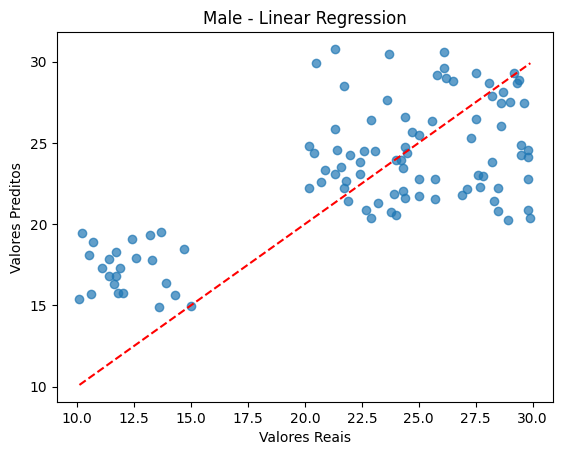

Male - Random Forest
MSE: 9.36, RMSE: 3.06, R²: 0.75
------------------------------


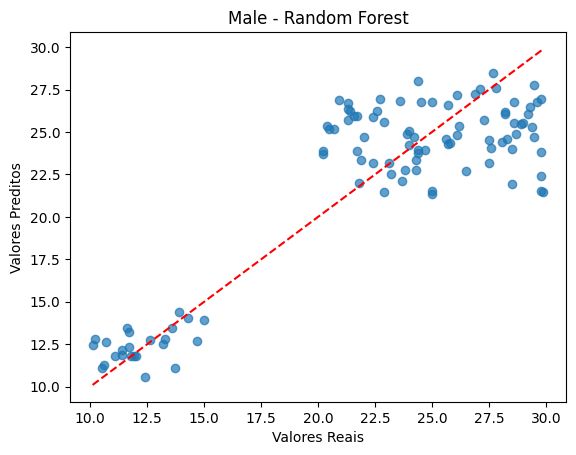

Female - Linear Regression
MSE: 18.83, RMSE: 4.34, R²: 0.42
------------------------------


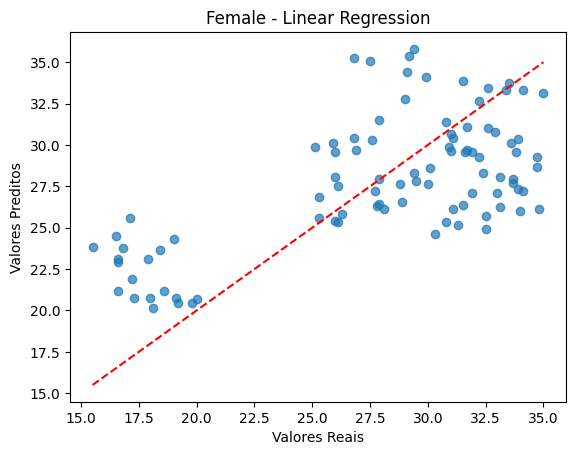

Female - Random Forest
MSE: 8.55, RMSE: 2.92, R²: 0.74
------------------------------


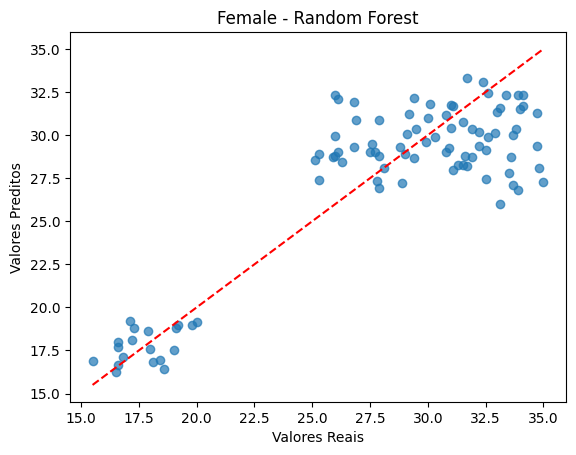

In [28]:
# Treinar e avaliar para homens
train_and_evaluate(models, X_male_train, X_male_test, y_male_train, y_male_test, label='Male')

# Treinar e avaliar para mulheres
train_and_evaluate(models, X_female_train, X_female_test, y_female_train, y_female_test, label='Female')

In [29]:
# Função para calcular o score (R²) dos modelos
def calculate_score(model, X_test, y_test):
    score = model.score(X_test, y_test)
    print(f"Score (R²) do modelo: {score:.2f}")

# Treinar e calcular o score para o Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_male_train, y_male_train)
print("Score para Linear Regression - Masculino:")
calculate_score(linear_reg_model, X_male_test, y_male_test)

linear_reg_model.fit(X_female_train, y_female_train)
print("Score para Linear Regression - Feminino:")
calculate_score(linear_reg_model, X_female_test, y_female_test)

# Treinar e calcular o score para o Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_male_train, y_male_train)
print("Score para Random Forest - Masculino:")
calculate_score(random_forest_model, X_male_test, y_male_test)

random_forest_model.fit(X_female_train, y_female_train)
print("Score para Random Forest - Feminino:")
calculate_score(random_forest_model, X_female_test, y_female_test)


Score para Linear Regression - Masculino:
Score (R²) do modelo: 0.49
Score para Linear Regression - Feminino:
Score (R²) do modelo: 0.42
Score para Random Forest - Masculino:
Score (R²) do modelo: 0.75
Score para Random Forest - Feminino:
Score (R²) do modelo: 0.74


In [34]:
# Treinar o modelo Random Forest para homens
rf_model_male = RandomForestRegressor(random_state=42)
rf_model_male.fit(X_male_train, y_male_train)
joblib.dump(rf_model_male, 'model_male.pkl')  # Salvar o modelo masculino

# Treinar o modelo Random Forest para mulheres
rf_model_female = RandomForestRegressor(random_state=42)
rf_model_female.fit(X_female_train, y_female_train)
joblib.dump(rf_model_female, 'model_female.pkl')  # Salvar o modelo feminino

['model_female.pkl']

In [33]:
# Verifique os parâmetros do modelo
print(rf_model_male.feature_importances_)  # ou model_female.feature_importances_
print(rf_model_female.feature_importances_) 

[0.95414619 0.01393041 0.01679449 0.01512891]
[0.95174257 0.01564081 0.01528806 0.01732856]
